In [9]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [2]:
# Load annotations.csv
annotations_path = 'generated_dataset/annotations.csv'
df = pd.read_csv(annotations_path)

# Define image size
img_size = (40, 40)

# Initialize empty arrays to store images and labels
images = []
labels = []

# Load images and labels from the dataset
for index, row in df.iterrows():
    img_path = os.path.join('generated_dataset', row['Image_Name'])
    label = row['Label']

    # Skip invalid labels
    if not label:
        continue

    # Read and resize the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, img_size)

    # Append image and label to the lists
    images.append(img)
    labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [4]:
for x in labels:
    print(x)

i
X
G
"
O
/
y
H
k
*
v
[
K
n
6
M
D
=
)
=
q
7
p
4
*
D
:
G
&
3
h
S
Y
O
E
(
I
)
1
0
o
s
:
9
}
8
L
J
x
g
8
:
4
Z
]
}
=
Q
E
G
5
H
:
-
E
N
d
@
l
L
/
6
}
A
?
-
c
S
0
A
F
[
}
$
-
Q
*
c
#
M
h
5
T
U
0
B
u
M
u
h
F
(
|
/
C
6
g
\
C
*
*
)
`
n
-
$
v
U
b
6
P
:
i
Y
&
@
p
q
h
A
w
^
\
/
>
J
s
0
<
)
I
O
<
R
`
e
1
q
,
*
V
t
6
#
(
~
u
L
.
j
7
$
i
Z
+
w
}
d
d
F
J
W
T
%
'
d
(
l
L
+
_
>
_
[
G
_
J
T
=
u
$
k
Y
[
5
y
_
\
:
r
2
5
5
P
,
c
.
Y
l
I
\
I
~
+
s
Z
$
N
V
)
)
!
@
>
b
_
`
s
]
K
p
,
c
I
a
4
E
_
|
F
c
$
)
?
T
;
D
x
/
%
}
x
u
`
%
9
Q
k
%
2
L
l
%
}
O
x
|
g
N
+
q
.
8
q
)
r
4
e
^
]
\
2
N
R
l
V
@
8
9
q
g
{
a
@
M
0
7
F
y
<
\
|
L
t
k
e
s
O
p
p
Z
)
/
t
V
#
8
+
a
I
^
6
R
Q
R
j
g
)
g
.
K
2
.
D
]
U
F
~
y
,
d
,
Y
.
j
O
?
d
;
[
7
6
t
x
p
?
;
K
p
+
E
`
`
9
(
N
;
Z
n
?
!
R
|
`
y
S
E
h
1
f
&
_
2
[
Y
r
b
+
_
o
I
N
@
D
i
v
Y
n
T
F
^
(
)
n
y
j
f
)
V
V
D
<
;
o
j
}
E
R
T
X
I
X
-
y
8
U
'
f
x
\
Q
a
n
{
0
A
<
%
$
b
S
$
9
]
5
c
r
"
Z
7
<
~
D
]
b
P
3
9
/
{
/
V
X
6
t
W
G
4
o
\
e
\
n
?
R
&
q
S
A
K
h
*
6
k
=
G
2
g
C
E
K
V
7
H
x
F
j
1
L
p


In [5]:
# Normalize pixel values to be between 0 and 1
images = images / 255.0

# Convert labels to one-hot encoding
label_dict = {label: i for i, label in enumerate(np.unique(labels))}
num_classes = len(label_dict)
labels = np.array([label_dict[label] for label in labels])
labels = to_categorical(labels, num_classes=num_classes)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

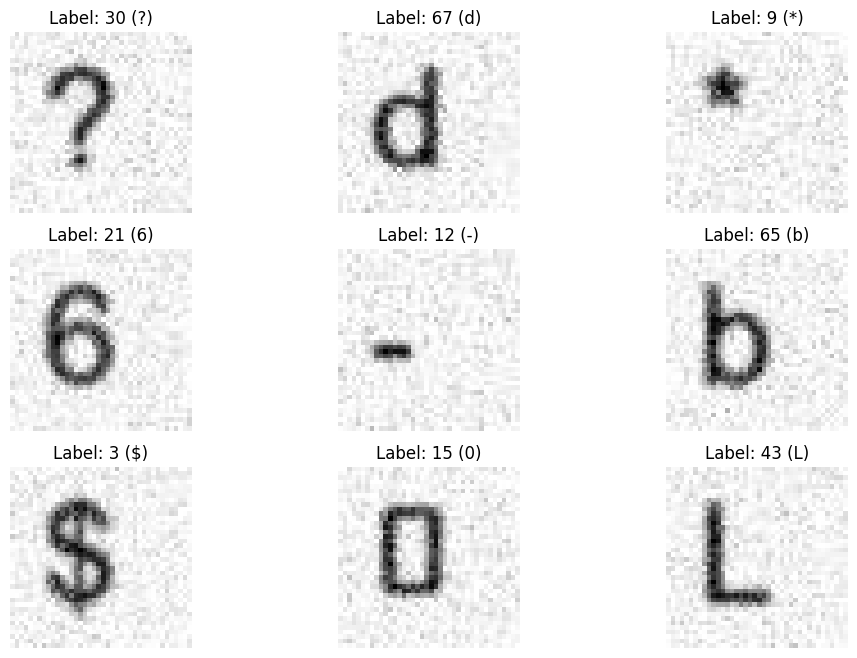

In [6]:
# Display 9 randomly selected training images with annotations
plt.figure(figsize=(12, 8))
random_indices = random.sample(range(len(X_train)), 9)

for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx].reshape(40, 40), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[idx])} ({list(label_dict.keys())[list(label_dict.values()).index(np.argmax(y_train[idx]))]})")
    plt.axis('off')

plt.show()

In [7]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train.reshape(-1, 40, 40, 1), y_train, epochs=20, validation_data=(X_test.reshape(-1, 40, 40, 1), y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 40, 40, 1), y_test)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('image_classification_model.h5')

Epoch 1/20
250/250 [==============================] - 10s 36ms/step - loss: 4.4417 - accuracy: 0.0243 - val_loss: 4.1279 - val_accuracy: 0.0370
Epoch 2/20
250/250 [==============================] - 9s 35ms/step - loss: 3.4234 - accuracy: 0.1590 - val_loss: 2.7622 - val_accuracy: 0.2640
Epoch 3/20
250/250 [==============================] - 9s 36ms/step - loss: 2.3041 - accuracy: 0.3494 - val_loss: 1.9705 - val_accuracy: 0.4305
Epoch 4/20
250/250 [==============================] - 10s 39ms/step - loss: 1.7227 - accuracy: 0.4990 - val_loss: 1.5496 - val_accuracy: 0.4985
Epoch 5/20
250/250 [==============================] - 11s 43ms/step - loss: 1.3669 - accuracy: 0.5884 - val_loss: 1.2174 - val_accuracy: 0.6285
Epoch 6/20
250/250 [==============================] - 10s 39ms/step - loss: 1.1181 - accuracy: 0.6685 - val_loss: 0.9869 - val_accuracy: 0.7340
Epoch 7/20
250/250 [==============================] - 10s 40ms/step - loss: 0.9346 - accuracy: 0.7304 - val_loss: 0.8552 - val_accuracy: 0

C:\Users\Ridwan Hidayatullah\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:

# Load the trained model
model = load_model('image_classification_model.h5')
annotations_path = 'generated_dataset/annotations.csv'
df_annotations = pd.read_csv(annotations_path)

# Function to preprocess the input image for inference
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (40, 40))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to predict the label of an image
def predict_image_label(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    confidence = prediction[0][predicted_label]
    return predicted_label, confidence

# Map predicted label to characters
characters = "!\"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~"
label_to_char = {i: char for i, char in enumerate(characters)}

# Predict labels for 10 random images
random_indices = random.sample(range(len(df_annotations)), 10)
for idx in random_indices:
    image_name = df_annotations.iloc[idx]["Image_Name"]
    image_path = os.path.join('generated_dataset', image_name)

    true_label = df_annotations.iloc[idx]["Label"]

    predicted_label, confidence = predict_image_label(image_path)
    predicted_character = label_to_char[predicted_label]

    print(f'Image: {image_path}')
    print(f'Ground Truth Label: {true_label}')
    print(f'Predicted Label: {predicted_character}, Confidence: {confidence:.2f}\n')

1/1 [==============================] - 0s 85ms/step
Image: generated_dataset\009129.jpg
Ground Truth Label: t
Predicted Label: t, Confidence: 1.00

1/1 [==============================] - 0s 31ms/step
Image: generated_dataset\006016.jpg
Ground Truth Label: ]
Predicted Label: ], Confidence: 1.00

1/1 [==============================] - 0s 32ms/step
Image: generated_dataset\009606.jpg
Ground Truth Label: @
Predicted Label: @, Confidence: 1.00

1/1 [==============================] - 0s 37ms/step
Image: generated_dataset\008985.jpg
Ground Truth Label: E
Predicted Label: E, Confidence: 1.00

1/1 [==============================] - 0s 30ms/step
Image: generated_dataset\003440.jpg
Ground Truth Label: S
Predicted Label: S, Confidence: 0.98

1/1 [==============================] - 0s 30ms/step
Image: generated_dataset\007966.jpg
Ground Truth Label: *
Predicted Label: *, Confidence: 0.85

1/1 [==============================] - 0s 32ms/step
Image: generated_dataset\008764.jpg
Ground Truth Label: m
Pr